# Homework 5: An External Forcing Experiment

Name: Lauren Bayne

Date: 09/22/2025

#### Overview
In class, we set up the MITgcm `global_ocean_ebm` configuration with the `exf` package to run on MITgcm. In this assignment, we will assess the output of this model configuration. 

To begin, import the Python modules for manging and plotting data, and making movies. Then, define a path to your homework 5 directory. Finally, the `diags` folder on Spartan to your local machine.

In [84]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

# define a path to the diags directory
diags_dir = '/Users/lkbayne/Desktop/modeling/HW/5/diags'

### Part 1: Choose Variables to Examine 
In this assignment, you'll investigate the relationship between a state variable (temperature, salinity, or velocity) and an associated forcing variable (heat flux, freshwater flux, or wind stress). 

In the markdown cell below, indicate which pair of variables you're going to investigate.

I am investigating temperature and heat flux.

### Part 2: Make a Movie
Next, make a movie for your variables of interest. The movie should show your state variable in one panel and your forcing variable in another panel. If you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [85]:
# provide a path to the data file
surf_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.0000000010.data')
flux_file = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.0000000010.data')

# read in the file and reshape it to the proper dimensions
grid = np.fromfile(surf_file, '>f4').reshape((2,40,90))
temp_grid = grid[0,:,:]

grid = np.fromfile(flux_file, '>f4').reshape((4,40,90))
flux_grid = grid[2,:,:]

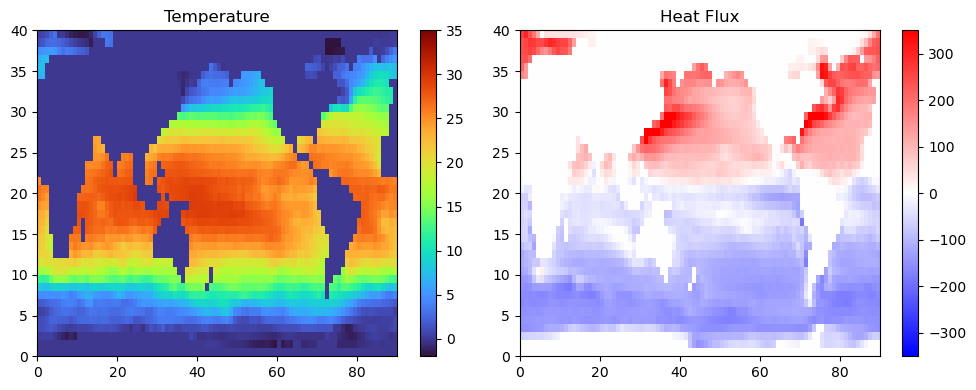

In [86]:
# make a figure object
fig = plt.subplots(1, 2, figsize=(10,4))

# plot the field
plt.subplot(1, 2, 1)
plt.pcolormesh(temp_grid, cmap='turbo', vmin = -2, vmax = 35)

plt.colorbar()
plt.title('Temperature')

plt.subplot(1, 2, 2)
plt.pcolormesh(flux_grid, cmap='bwr', vmin = -350, vmax = 350)

plt.colorbar()
plt.title('Heat Flux')

plt.tight_layout()

# show the figure
plt.show()

In [87]:
# define a plot_frame function which takes in two arguments:
#    - the file path of a uvel file to read
#    - the file path where the plot will be stored
def plot_frame(surf_file, flux_file, image_path):

    # make a figure object
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # read in the file and reshape it to the proper dimensions
    grid = np.fromfile(surf_file, '>f4').reshape((2,40,90))
    temp_grid = grid[0,:,:]

    grid = np.fromfile(flux_file, '>f4').reshape((4,40,90))
    flux_grid = grid[2,:,:] 
    
    # plot the field
    plt.subplot(1, 2, 1)
    plt.pcolormesh(temp_grid, cmap='turbo', vmin = -2, vmax = 35)
    plt.colorbar()
    plt.title('Temperature')

    plt.subplot(1, 2, 2)
    plt.pcolormesh(flux_grid, cmap='bwr', vmin = -350, vmax = 350)
    plt.colorbar()
    plt.title('Heat Flux')

    plt.tight_layout()

    # show the figure
    plt.savefig(image_path)
    plt.close(fig)

In [88]:
# make a list that will hold the paths
file_list = []

startday = 30
endday = 7290
step = 20

# loop through each day of the year
for day in range(startday,endday, step): #1 to 366 for full loop

    # identify the data file path
    surf_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.'+'{:010d}'.format(day)+'.data')
    flux_file = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')
    
    # identify the image file path
    image_path = os.path.join(diags_dir, 'output', 'snapshots', 'snapshot.'+'{:010d}'.format(day)+'.png')

    # call the plotting function
    plot_frame(surf_file, flux_file, image_path)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

In [89]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(diags_dir, 'output', 'movie.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/lkbayne/Desktop/modeling/HW/5/diags/output/movie.mp4.
Moviepy - Writing video /Users/lkbayne/Desktop/modeling/HW/5/diags/output/movie.mp4



Moviepy - Done !
Moviepy - video ready /Users/lkbayne/Desktop/modeling/HW/5/diags/output/movie.mp4


Comment on any features you observe in your movie. Place particular focus on the potential connection(s) between your state variable and the forcing.

The heat flux intensity increases and decreases (seasonally so 1 year timespand in the 10 year movie). The northern hemisphere heatflux is negative and then switches to positive, and the eastern boundary currents increase the most. This high heat flux leads to warmer temperatues in the ocean adn especially along the estern coast lines. The arctic is colder and the antartic is warmer.

Then the heatflux switches and the southern hemisphpere is positive correlataing with colder antarcitc temperatues and warmer artic temperatures temperatues.
Overall it is interesting to see the heatflux change drastically and the temperatures move "up and down" in a band along the equator kind of.

Absolutely so cool! I showed my lab and everyone loved it!

### Part 3: Plot Time Series at a Location
Based on your movie, choose an interesting place in your model domain and create a timeseries of your variables at this location. There should be two plots - either as two horizontal subplots (one for each variable), or one plot with two separate y-axes for the different variables.

Again you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [90]:
# to choose your location
#Japan east coast current
y0,y1 = 25,35
x0,x1 = 25,35

In [91]:
# make your timeseries
# make an empty array
nsteps = (7290 - 30) // 20
temp_timeseries = np.zeros((nsteps,))
flux_timeseries = np.zeros((nsteps,))
days = np.zeros((nsteps,))

# loop through all the files in the diags dir
for i, day in enumerate(range(30, 7290, 20)):

    surf_file = os.path.join(diags_dir, 'diagSurf', f'diagSurf.{day:010d}.data')
    flux_file = os.path.join(diags_dir, 'diagsEXF', f'diagsEXF.{day:010d}.data')

    # read temperature (variable 0)
    grid = np.fromfile(surf_file, '>f4').reshape((2,40,90))
    temp_grid = grid[0,:,:]
    temp_timeseries[i] = temp_grid[y0:y1+1, x0:x1+1].mean()

    # read heat flux (variable 2)
    grid = np.fromfile(flux_file, '>f4').reshape((4,40,90))
    flux_grid = grid[2,:,:]
    flux_timeseries[i] = flux_grid[y0:y1+1, x0:x1+1].mean()

    # store the model day
    days[i] = day

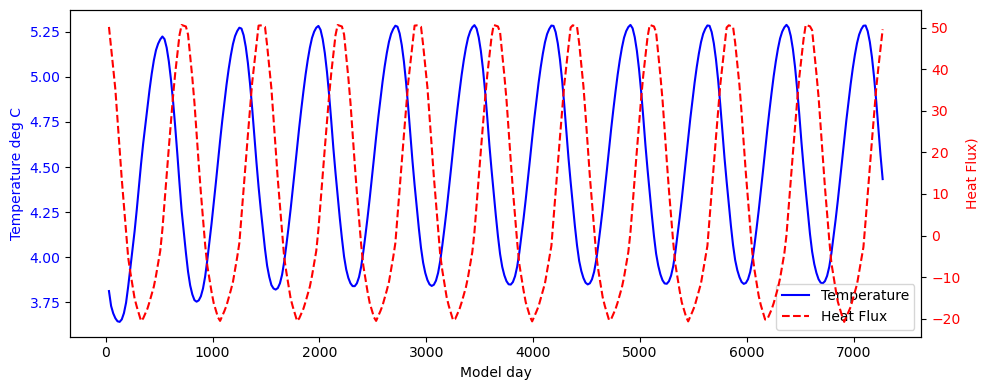

In [92]:
fig, ax1 = plt.subplots(figsize=(10,4))

#temperature
p1, = ax1.plot(days, temp_timeseries, color='blue', label='Temperature')
ax1.set_xlabel("Model day")
ax1.set_ylabel("Temperature deg C", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#heatflux
ax2 = ax1.twinx()
p2, = ax2.plot(days, flux_timeseries, color='red', linestyle='--', label='Heat Flux')
ax2.set_ylabel("Heat Flux)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines = [p1, p2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

fig.tight_layout()
plt.show()


Comment on any features you observe in your timeseries. Place particular focus on the potential connection(s) between your state variable and the forcing. Is there anything you observe in your timeseries that you didn't catch by eye in your movie?

This point is located near the east coast of Japan, within the Kuroshio Current region. 

The time series shows that temperature and heat flux peak in opposite directions, with a noticeable lag. The peaks in heat flux (positive input to the ocean) are followed by rising temperatures, while negative flux (heat loss) precedes cooling. 

This highlights the strong seasonal coupling between surface forcing and the ocean’s thermal response. 

The lagged relationship seen in the movie is easier to identify in the time series.